<a href="https://colab.research.google.com/github/IgorvH-Developer/ColaboratoryFailes/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn

from google.colab import drive

In [3]:
device = torch.device("cuda")

Загружаем данные:

In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Таблица с исходными данными, но нормализованными(табл 1):



In [92]:
dataExcelTable = pd.read_excel('/content/drive/MyDrive/Задание_практика/Test1(Заполненная).xlsx') 

 Таблица с вероятностями покупки, полученными из распределений признаков на интервалах(табл 2):


In [6]:
dataExcelTableWithPossibilities = pd.read_excel('/content/drive/MyDrive/Задание_практика/Test1(для обучения).xlsx') 

In [7]:
dataExcelTableWithPossibilities

,Есть сайт,Указана почта,Уст. Капитал,Выручка,Основные средства,Запасы,Деб. Задолженность,Кред. Задолженность,Чистая прибыль,Прибыль,Прибыль до налогов,Финансовая независимость,Текущая ликвидность,Текущая ликвидность .1,Купил
0,0,0,0.593819,0.567368,0.550877,0.345774,0.489703,0.467682,0.324224,0.567372,0.436481,0.503472,0.450413,0.461444,1
1,1,1,0.591912,0.233129,0.501940,0.657828,0.353927,0.467682,0.324224,0.206897,0.308890,0.471390,0.501899,0.461444,1
2,1,1,0.527809,0.408375,0.422801,0.408764,0.489703,0.371380,0.441809,0.567372,0.436481,0.522388,0.517457,0.463837,1
3,1,1,0.527809,0.567368,0.501940,0.534494,0.489703,0.467682,0.441809,0.422045,0.436481,0.522388,0.517457,0.460058,1
4,0,0,0.396880,0.567368,0.501940,0.345774,0.489703,0.467682,0.562384,0.567372,0.551786,0.525410,0.450413,0.463837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0,1,0.218978,0.408375,0.422801,0.345774,0.353927,0.371380,0.206349,0.275053,0.308890,0.525410,0.501899,0.461444,0
3993,1,1,0.396880,0.567368,0.422801,0.534494,0.489703,0.467682,0.562384,0.567372,0.551786,0.525410,0.517457,0.460058,0
3994,1,0,0.591912,0.567368,0.676149,0.408764,0.489703,0.467682,0.441809,0.275053,0.436481,0.541667,0.439206,0.461444,0
3995,0,1,0.396880,0.408375,0.363636,0.408764,0.353927,0.371380,0.441809,0.567372,0.551786,0.476364,0.501899,0.463837,0


In [93]:
dataExcelTable

,id,Есть сайт,Указана почта,Уст. Капитал,Выручка,Основные средства,Запасы,Деб. Задолженность,Кред. Задолженность,Чистая прибыль,Прибыль,Прибыль до налогов,Купил
0,2,1,1,7.746219e-05,0.000139,2.497418e-05,0.000017,0.000120,0.000127,0.000018,2.819982e-04,0.000027,1
1,3,0,0,4.792732e-04,0.000009,6.328128e-06,0.002460,0.000070,0.000773,0.000003,9.436900e-07,0.000003,1
2,9,0,0,3.194976e-06,0.000089,2.886261e-07,0.000163,0.000176,0.000052,0.000195,2.416554e-04,0.000195,1
3,11,0,0,2.196546e-05,0.000156,2.504633e-06,0.000876,0.000120,0.000099,0.000173,9.382638e-05,0.000142,1
4,12,1,0,3.194976e-08,0.000460,2.921538e-06,0.000011,0.000903,0.000747,0.001300,7.936433e-04,0.001305,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,8885,1,1,2.683780e-08,0.000079,2.790053e-07,0.000003,0.000078,0.000035,0.000000,1.856710e-05,0.000004,0
4004,8886,0,1,3.194976e-08,0.000205,2.573583e-07,0.000481,0.000279,0.000129,0.000410,5.095454e-04,0.000411,0
4005,8888,0,1,8.854421e-04,0.000149,1.922250e-04,0.000036,0.000140,0.000563,0.000064,6.511461e-06,0.000041,0
4006,8889,1,1,3.194976e-08,0.000081,5.612175e-08,0.000149,0.000093,0.000080,0.000214,2.401219e-04,0.000224,0


Табл 1

In [94]:
dataTensor = torch.tensor(dataExcelTable.values)
dataX = dataTensor[:,1:12]
dataY = dataTensor[:,12]
print(dataX.shape)
print(dataY)

torch.Size([4008, 11])
tensor([1., 1., 1.,  ..., 0., 0., 0.], dtype=torch.float64)


Табл 2

In [95]:
dataTensor = torch.tensor(dataExcelTableWithPossibilities.values)
dataX = dataTensor[:,:11]
dataY = dataTensor[:,14]
print(dataX.shape)
print(dataY)

torch.Size([3997, 11])
tensor([1., 1., 1.,  ..., 0., 0., 0.], dtype=torch.float64)


In [80]:
order = np.random.permutation(len(dataTensor))
order

array([3617, 3643, 2051, ..., 1537, 3890,  215])

In [81]:
dataXTrain = dataX[order[:2200]]        
dataYTrain = dataY[order[:2200]]
dataXValid = dataX[order[2200:3000]]
dataYValid = dataY[order[2200:3000]]
dataXTest = dataX[order[3000:3997]]
dataYTest = dataY[order[3000:3997]]

In [69]:
dataXTrain.shape

torch.Size([2200, 11])

# Матрица корреляции

Таблицы 1:


,id,Есть сайт,Указана почта,Уст. Капитал,Выручка,Основные средства,Запасы,Деб. Задолженность,Кред. Задолженность,Чистая прибыль,Прибыль,Прибыль до налогов,Купил
id,1.000000,0.064186,-0.028520,-0.002877,-0.027724,0.013324,-0.034801,-0.033532,-0.033748,-0.028172,-0.027646,-0.026965,-0.908728
Есть сайт,0.064186,1.000000,0.200513,0.060170,0.052213,0.053706,0.047347,0.056643,0.054245,0.069647,0.081034,0.074362,-0.041382
Указана почта,-0.028520,0.200513,1.000000,0.053563,0.072439,0.039639,0.096347,0.099163,0.096953,0.057722,0.086780,0.063034,0.061344
Уст. Капитал,-0.002877,0.060170,0.053563,1.000000,0.297884,0.793680,0.213760,0.256422,0.261864,0.389089,0.376132,0.413513,0.006196
Выручка,-0.027724,0.052213,0.072439,0.297884,1.000000,0.205589,0.773377,0.760408,0.811393,0.412937,0.517132,0.448358,0.033764
Основные средства,0.013324,0.053706,0.039639,0.793680,0.205589,1.000000,0.149137,0.143995,0.174670,0.191627,0.249402,0.206678,-0.013014
Запасы,-0.034801,0.047347,0.096347,0.213760,0.773377,0.149137,1.000000,0.620828,0.756204,0.318349,0.379392,0.339473,0.044576
Деб. Задолженность,-0.033532,0.056643,0.099163,0.256422,0.760408,0.143995,0.620828,1.000000,0.862059,0.408140,0.498304,0.441464,0.040524
Кред. Задолженность,-0.033748,0.054245,0.096953,0.261864,0.811393,0.174670,0.756204,0.862059,1.000000,0.327995,0.421121,0.363372,0.038809
Чистая прибыль,-0.028172,0.069647,0.057722,0.389089,0.412937,0.191627,0.318349,0.408140,0.327995,1.000000,0.739214,0.991290,0.026416


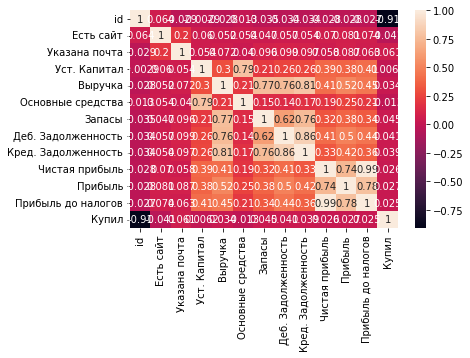

In [97]:
corrMatr = dataExcelTable.corr()
sn.heatmap(corrMatr, annot=True)

corrMatr

Таблицы 2:

,Есть сайт,Указана почта,Уст. Капитал,Выручка,Основные средства,Запасы,Деб. Задолженность,Кред. Задолженность,Чистая прибыль,Прибыль,Прибыль до налогов,Финансовая независимость,Текущая ликвидность,Текущая ликвидность .1,Купил
Есть сайт,1.000000,0.243696,0.026131,0.070014,0.016594,0.057841,0.061777,0.057560,0.066378,0.072003,0.060924,0.002966,-0.019770,-0.007319,-0.028609
Указана почта,0.243696,1.000000,0.031746,0.089210,0.038678,0.070837,0.072268,0.083690,0.066862,0.082357,0.070398,0.009530,-0.002239,0.027954,0.054194
Уст. Капитал,0.026131,0.031746,1.000000,0.323957,0.429403,0.259840,0.336977,0.328392,0.326240,0.345981,0.333646,-0.264181,-0.004154,-0.043865,0.100697
Выручка,0.070014,0.089210,0.323957,1.000000,0.475935,0.578142,0.696200,0.692223,0.566826,0.668440,0.594309,0.063284,0.128010,0.207817,0.224467
Основные средства,0.016594,0.038678,0.429403,0.475935,1.000000,0.391100,0.476571,0.490878,0.436016,0.492873,0.452885,0.193488,-0.034761,-0.028879,0.185497
Запасы,0.057841,0.070837,0.259840,0.578142,0.391100,1.000000,0.544674,0.619195,0.386165,0.470906,0.401163,0.037790,0.156256,0.100062,0.179573
Деб. Задолженность,0.061777,0.072268,0.336977,0.696200,0.476571,0.544674,1.000000,0.786501,0.549033,0.614470,0.567214,0.047215,0.147334,0.031607,0.199779
Кред. Задолженность,0.057560,0.083690,0.328392,0.692223,0.490878,0.619195,0.786501,1.000000,0.503364,0.582004,0.524752,0.058046,0.051559,0.051782,0.181576
Чистая прибыль,0.066378,0.066862,0.326240,0.566826,0.436016,0.386165,0.549033,0.503364,1.000000,0.773912,0.934787,0.037098,0.028631,-0.190874,0.166587
Прибыль,0.072003,0.082357,0.345981,0.668440,0.492873,0.470906,0.614470,0.582004,0.773912,1.000000,0.799389,0.039368,0.056908,-0.064172,0.199786


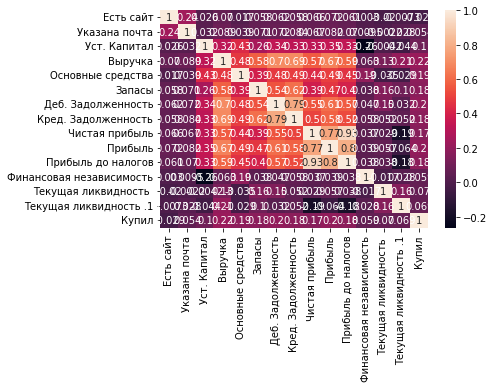

In [99]:
corrMatr = dataExcelTableWithPossibilities.corr()
sn.heatmap(corrMatr, annot=True)

corrMatr

# Создаём нейронную сеть

In [82]:
class buyPrediction(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_input_parameters):
        super(buyPrediction, self).__init__()
        self.fc1 = torch.nn.Linear(n_input_parameters, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
        self.act3 = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.act1(
          self.fc1(x))
        #x = self.act2(
          #self.fc2(x))
        x = self.act3(
          self.fc3(x))
        return x.squeeze()

    def loss(self, pred, targets):
        return torch.nn.MSELoss()(pred.float(),targets.float())

In [83]:
#paramCountTable1 = 11
#paramCountTable2 = 14

In [84]:
predictionNet = buyPrediction(n_hidden_neurons=6, n_input_parameters = 11)

# Обучаем нейронную сеть

In [85]:
optimizer = torch.optim.Adam(predictionNet.parameters(), 
                             lr=0.0001)    
batch_size = 2200
loss_metric_history = torch.zeros(4,70)
for epoch in range(25000):
    order = np.random.permutation(len(dataXTrain))
    for start_index in range(0, len(dataXTrain), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = dataXTrain[batch_indexes]
        y_batch = dataYTrain[batch_indexes]
        
        preds = predictionNet.forward(x_batch.float()) 
        loss_value = predictionNet.loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 1000 == 0:
        numberInHistory = epoch // 1000
        train_preds = predictionNet.forward(dataXTrain.float())
        acuracyTrain = (train_preds.round() == dataYTrain).double().sum() / len(dataYTrain)
        valid_preds = predictionNet.forward(dataXValid.float())
        acuracyValid = (valid_preds.round() == dataYValid).double().sum() / len(dataYValid)
        loss_metric_history[0,numberInHistory] = predictionNet.loss(train_preds, dataYTrain).item()
        loss_metric_history[1,numberInHistory] = acuracyTrain.item()
        loss_metric_history[2,numberInHistory] = predictionNet.loss(valid_preds, dataYValid).item()
        loss_metric_history[3,numberInHistory] = acuracyValid.item()

        print('loss_Valid:',loss_metric_history[2,numberInHistory].item(),'lossTrain:', loss_metric_history[0,numberInHistory].item(), 
              'trainAcc:', loss_metric_history[1,numberInHistory].item())

loss_Valid: 0.25051841139793396 lossTrain: 0.2513647973537445 trainAcc: 0.5318182110786438
loss_Valid: 0.24735312163829803 lossTrain: 0.2479320764541626 trainAcc: 0.5318182110786438
loss_Valid: 0.24528129398822784 lossTrain: 0.24611933529376984 trainAcc: 0.5340909361839294
loss_Valid: 0.24285228550434113 lossTrain: 0.24404360353946686 trainAcc: 0.5604545474052429
loss_Valid: 0.24028514325618744 lossTrain: 0.24176472425460815 trainAcc: 0.5895454287528992
loss_Valid: 0.23809844255447388 lossTrain: 0.23955854773521423 trainAcc: 0.5931817889213562
loss_Valid: 0.2364749163389206 lossTrain: 0.23757845163345337 trainAcc: 0.5995454788208008
loss_Valid: 0.23526757955551147 lossTrain: 0.2359536737203598 trainAcc: 0.6022727489471436
loss_Valid: 0.2343110591173172 lossTrain: 0.23468764126300812 trainAcc: 0.6063636541366577
loss_Valid: 0.23350852727890015 lossTrain: 0.23368258774280548 trainAcc: 0.6054545640945435
loss_Valid: 0.2329772412776947 lossTrain: 0.23291128873825073 trainAcc: 0.61045455932

# Графики
# зелёный - метрика(train), синий - метрика(valid), жёлтый - функ. потерь(valid), красный - функ. потерь(train))


torch.Size([4, 70])

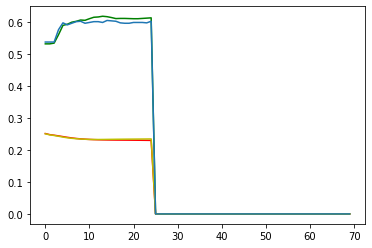

In [86]:
plt.plot(loss_metric_history[0,:70],'r',loss_metric_history[1,:70],'g',loss_metric_history[2,:70],'y', loss_metric_history[3,:70])
loss_metric_history.shape

In [87]:
predTest = predictionNet.forward(dataXTest.float())
predLoss = predictionNet.loss(predTest, dataYTest).item()
predLoss

0.23312422633171082

In [88]:
acuracyTest = (predTest.round() == dataYTest).double().sum() / len(dataYTest)
acuracyTest

tensor(0.6179, dtype=torch.float64)